# QR iteration

### _Note: QR decomposition and Hessenberg transformation are using packages)_

The QR iteration and Hessenberg transformation will be investigated on a simple matrix.

$$\begin{pmatrix} 2 & 1 & 6 & 3 & 5 \\
                  1 & 1 & 3 & 5 & 1 \\
                  0 & 3 & 1 & 6 & 2 \\
                  0 & 0 & 2 & 3 & 1 \\
                  0 & 0 & 0 & 2 & 2 \\
\end{pmatrix}$$

In [129]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math as m
import pandas as pd

## Creating the matrix

In [130]:
data = [2, 1, 6, 3, 5, 1, 1, 3, 5, 1, 0, 3, 1, 6, 2, 0, 0, 2, 3, 1, 0, 0, 0, 2, 2]
dim = int(m.sqrt(len(data)))
mat = []
idx = 0
while idx < (dim*dim):
    row = []
    for i in range(dim):
        row.append(data[idx]+ 0.j)
        idx += 1
    mat.append(np.array(row))
mat = np.array(mat)
mat

array([[2.+0.j, 1.+0.j, 6.+0.j, 3.+0.j, 5.+0.j],
       [1.+0.j, 1.+0.j, 3.+0.j, 5.+0.j, 1.+0.j],
       [0.+0.j, 3.+0.j, 1.+0.j, 6.+0.j, 2.+0.j],
       [0.+0.j, 0.+0.j, 2.+0.j, 3.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j, 2.+0.j]])

## QR Iteration - Implementation

for **QR decomposition** <br>
$R = Q^T A$ <br>
where, $Q$ is an orthogonal matrix $({Q}^{T}Q = I)$ and $R$ is an upper triangular matrix. <br>
Assume that $A$ is: <br>
$$\begin{pmatrix}   {a_{11}} & {a_{12}} \\
                    {a_{21}} & {a_{22}} \\
\end{pmatrix}$$
<br>
a typical transpose is **2-D** is a rotation by $\theta$ <br>
$$\begin{pmatrix}   {\cos\theta} & {\sin\theta} \\
                    {-\sin\theta} & {\cos\theta} \\
\end{pmatrix}$$
<br>
By applying $R = {Q}^{T}A$ we get <br>
$-a_{11} \sin\theta + a_{21} \cos\theta = 0 \rightarrow a_{11} \sin\theta = a_{21} \cos\theta $ <br>
if $ a_{11} \neq 0 \rightarrow \tan{\theta} = \frac{a_{21}}{a_{11}} $ <br>
if $ a_{11} = 0 \rightarrow \cos\theta = 0 $ <br> <br>

For larger matrices, we do this transformation using $S$ matrices, where <br>
$ {S}_1 = S_{2,1} . S_{3,1} ... S_{n,1} $ <br>
$ {S}_2 = S_{3,2} . S_{4,2} ... S_{n,2} $ <br>
. <br>
. <br>
. <br>
$ {S}_{n-1} = S_{n,n-1}$ <br>
weher, $S_{ij}$ means the $i^{th}$ element in the $j^{th}$ column will be zero in matrix **A**
<br> And <br>
${Q}^{T} = {S}_{n-1} . {S}_{n-2} ... {S}_2 . {S}_1 $ <br>

The $S_{ij}$ matrix which can make an element zero is sparse. Therefore it is represented by a special structure:

For every $S_{ij}$ matrix, let the angle be $\theta$ and $tan$ is $\tan{\theta}$ <br>
then, <br> ${\sec}^{2}{\theta} = 1 + {\tan}^{2}{\theta}$ $\rightarrow$ ${\sec\theta} = \sqrt{1 + {\tan}^{2}{\theta}}$ $\rightarrow$ $\frac{1}{\cos\theta} = \sqrt{1 + {tan}^{2}}$ <br> 
Hence, <br> ${\cos\theta} = \frac{1}{\sqrt{1 + {tan}^{2}}}$ <br>
<br>
Also, we know that <br> ${\sin\theta} = \sqrt{1 - {\cos}^{2}{\theta}}$ $\rightarrow$ ${\sin\theta} = \sqrt{1 - \frac{1}{1 + {tan}^{2}}}$ <br>
Hence, <br> ${\sin\theta} = \frac{tan}{\sqrt{1 + {tan}^{2}}}$ <br> <br>
When $\tan{\theta} = \infty$ $\rightarrow$ $\rightarrow$ ${\sin\theta} = 1$ and ${\cos\theta} = 0$

In [131]:
class S:
    def __init__(self, i, j, tan = 0):
        self.i = i
        self.j = j
        self.sin = self.__to_sin(tan)
        self.cos = self.__to_cos(tan)
        
    def __to_sin(self, tan):
        return tan / m.sqrt(1.0 + tan * tan)
    
    def __to_cos(self, tan):
        return 1.0 / m.sqrt(1.0 + tan * tan)
    
    def infinity_tan(self):
        self.sin = 1.0
        self.cos = 0.0                                  

This multiplication should exhaust the fact that $S_{ij}$ is sparse.

let's assume that we want to make the fifth element of the first column to be zero $( a_{5,1} \rightarrow {\grave a}_{5,1} = 0)$ <br>
$S_{5,1}$ matrix looks like this: <br>
$$\begin{pmatrix}   \cos\theta_{n,1}&   &   &   &   &\sin\theta_{n,1}   \\
                    & 1 &   &   &   &   \\
                    &   & 1 &   &   &   \\
                    &   &   & 1 &   &   \\
                    &   &   &   & 1 &   \\
                    -\sin\theta_{n1}&   &   &   &   &\cos\theta_{n1}   \\
\end{pmatrix}$$
<br>
$ {\grave a}_{1,1} = {a}_{1,1} . \cos + {a}_{1,5} . \sin $ <br>
$ {\grave a}_{5,1} = {a}_{5,1} . \cos + {a}_{1,1} . \sin $ <br> <br>
Then, $S_{5,2}$ matrix looks like this: <br>
$$\begin{pmatrix}   \cos\theta_{n-1,1}&   &   &   &   &\sin\theta_{n-1,1}   \\
                    & 1 &   &   &   &   \\
                    &   & 1 &   &   &   \\
                    &   &   & 1 &   &   \\
                    -\sin\theta_{n-1,1}&   &   &   &   &\cos\theta_{n-1,1}   \\
                    &   &   &   &   &  1   \\
\end{pmatrix}$$
<br>etc...

In [132]:
def sij_dot_A(s_ij, A): # A should be a numpy matrix
    for idx in range(0, A.shape[1]):
        temp = A[s_ij.j, idx] * s_ij.cos + A[s_ij.i, idx] * s_ij.sin
        A[s_ij.i, idx] = A[s_ij.i, idx] * s_ij.cos - A[s_ij.j, idx] * s_ij.sin
        A[s_ij.j, idx] = temp

After eliminating all the zeros under the diagonal the transpose of $S's$ are applied from the right to get the new **A**.

In [133]:
def A_dot_transpose_sij(A, s_ij):
    for idx in range(0, A.shape[0]):
        temp = A[idx, s_ij.j] * s_ij.cos + A[idx, s_ij.i] * s_ij.sin
        A[idx, s_ij.i] = A[idx, s_ij.i] * s_ij.cos - A[idx, s_ij.j] * s_ij.sin
        A[idx, s_ij.j] = temp

The actual $S$ for the current state of the **A** at $i, j$:

In [134]:
def next_s(A, i, j, tolerance=1e-10):
    if abs(A[j, j]) < tolerance:
        s = S(i, j)
        s.infinity_tan()
        return s
    else:
        tan = A[i, j] / A[j, j]
        return S(i, j, tan)

The eigenvalues are given as the diagonal elements in the **A** after sufficient number of **QR** iteration. A function for accessing the diagonal elements:

In [135]:
def diagonals(A):
    eis = []
    for idx in range(0, A.shape[0]):
        eis.append(A[idx, idx])
        
    return eis

Then one step in the **QR** iteration ($A_{k+1} = Q^T \cdot A_{k} \cdot Q$) can be implemented in the following way:

In [136]:
def qr_one_step(A):
    s_list = []
    for j in range(0, A.shape[1]): # multiplications from left, erasing zeros in the j. column 
        for i in range(A.shape[0] - 1, j, -1):
            s_temp = next_s(A, i, j)
            sij_dot_A(s_temp, A)
            s_list.append(s_temp)
    for s in s_list: # multiplying from right, the order is good due to append
        A_dot_transpose_sij(A, s)

#### Claculate final eigenvalues

if value below diagonal is not close enough to zero, this means that there are conjugate complex eigenvalues, two conjugate complex eigenvalues will be held in a sub matrix $h_{n,n}, h_{n+1,n+1}, h_{n,n+1}, h_{n+1,n}$ of the size $2x2$. <br>


$$\begin{pmatrix}   &   &   &   &   &   &   \\
                    &   &   &   &   &   &   \\
                    &   &  {h_{n,n}} & {h_{n,n+1}} &   &   &   \\
                    &   &  {h_{n+1,n}} & {h_{n+1,n+1}} &   &   &   \\
                    &   &   &   &   &   &   \\
                    &   &   &   &   &   &   \\
                    &   &   &   &   &   &   \\
\end{pmatrix}$$


By comparing $h_{n+1,n}$ and $h_{n,n+1}$, if their absolute value is equal and their sign is opposite, we have the eigenvalues. <br>

$$\begin{pmatrix}   {Re} & {Im} \\
                    {Im} & {Re} \\
\end{pmatrix}$$

If not, we calculate the eigenvalues of the $2x2$ matrix $h_{n,n}, h_{n+1,n+1}, h_{n,n+1}, h_{n+1,n}$. <br>

$$\begin{pmatrix}   {h_{n,n}} & {h_{n,n+1}} \\
                    {h_{n+1,n}} & {h_{n+1,n+1}} \\
\end{pmatrix}$$

In [137]:
def calc2Eigenvalues(mat):
    eigen_vals = []
    a = 1
    b = -mat[0, 0] - mat[1, 1]
    c = mat[0, 0] * mat[1, 1] - mat[0, 1] * mat[1, 0]
    if ((b * b) >= (4.0 * a * c)):
        mat[0, 0] = (-b + m.sqrt((b * b) - (4.0 * a * c))) / 2.0 / a
        mat[1, 1] = (-b - m.sqrt((b * b) - (4.0 * a * c))) / 2.0 / a
        mat[1, 0] = 0.0
        mat[0, 1] = 0.0
        eigen_vals = diagonals(mat)
    else:
        mat[0, 0] = -b / 2.0 / a
        mat[1, 1] = mat[0, 0]
        mat[0, 1] = m.sqrt((4.0 * a * c) - (b * b)) / 2.0 / a
        mat[1, 0] = -mat[0, 1]
        eigen_vals = [complex(mat[0, 0], mat[0, 1]), complex(mat[1, 1], mat[1, 0])]
    return eigen_vals

In [138]:
def getAccEigenvalues(A):
    eig_vals = []
    i = 0
    while(i<(A.shape[0]-1)):
        if abs(A[i+1, i]) <= 1e-10:
            eig_vals.append(complex(A[i, i]))
        elif A[i+1, i] == -(A[i, i+1]):
            eig_vals.append(complex(A[i, i], A[i+1, i]))
            eig_vals.append(complex(A[i+1, i+1], A[i, i+1]))
            i+=1
        else:
            mat = A[i:i+2, i:i+2].copy()
            eig_vals += calc2Eigenvalues(mat)
            i+=1
        i+=1
    return eig_vals

Then the **QR** iteration is given as follows:

In [139]:
def qr(A, iter_num=1e6, error=1e-6, callback = None, shift = False): # shift: True shifting is applied
    
    # helper for calculating the error
    diag = diagonals(A)
    def sum_sq():
        loss = 0.0
        for x in diag:
            loss += x * x
        return loss
    
    ei_sum_0 = sum_sq()
    
    it = 0
    terminate = False
    while not terminate:       
        Q, R = np.linalg.qr(A)
        A = np.matmul(R, Q)
        
        # error calculation and administration
        diag = getAccEigenvalues(A)
        ei_sum_1 = sum_sq()
        Err = ei_sum_1 - ei_sum_0
        
        if not (callback is None):
            callback(Err)
            
        ei_sum_0 = ei_sum_1
        it += 1
        if (abs(Err) <= error) or (it >= iter_num): terminate = True
    return diag

#### Extra documentation

matrix $S_{i1}$ will make item $A_{i1}$ ($i th$ row and $1st$ column) <br>
the form of $S_{i1}$ in this case will be: <br>

$$\begin{pmatrix} \cos(\theta_{i1}) &   &   & \sin(\theta_{i1}) &   &   &   \\
                    & 1 &   &   &   &   &   \\
                    &   & 1 &   &   &   &   \\
                    -\sin(\theta_{i1}) &   &   & \cos(\theta_{i1}) &   &   &   \\
                    &   &   &   & 1 &   &   \\
                    &   &   &   &   & . &   \\
                    &   &   &   &   &   & 1 \\
\end{pmatrix}$$

note that, for **QR decomposition** <br>
$R = Q^T A$ <br>
also,
$R = \left[ \prod_{i=1}^{n-1} \prod_{j=i+1}^{n} S_{ji} \right] A$ <br>
then,
$ Q^T  = \left[ \prod_{i=1}^{n-1} \prod_{j=i+1}^{n} S_{ji} \right] $ <br><br>
when the algorithm iterates <br>
at step $k+1$: $A_{k+1} = R_{k} \cdot {Q}_k$ <br>
but, $R_k = {Q^T}_k \cdot A_k$ <br>
then, $A_{k+1} = {Q^T}_k  A_k {Q}_k$ $\Rightarrow$ _backward transformation_<br><br>

algorithm work as the following:<br>
for each iteration $k$<br>
&emsp; for every column $j$ in $A_k$<br>
&emsp; &emsp; generate $ S_{ij}$ <br>
&emsp; &emsp; calculate $ S_{ij} A_k $<br>
&emsp; &emsp; save $S_{ij}$ in $S$ list <br>
&emsp; &emsp; the resulted $A$ at this point is $R$<br>
&emsp; &emsp; &emsp; to get next $A ( = A_{k+1})$ , we should multiply $R ( = A_k)$ by $S^T ( = {\left[ \prod_{i=1}^{n-1} \prod_{j=i+1}^{n} S_{ji} \right]}^T)$<br>
&emsp; &emsp; &emsp; backward transformation <br>

&emsp; for every $S_{ij}$ in $S$ list<br>
&emsp; &emsp; calculate $A_k {S_{ij}}^T$ <br>
&emsp; result is $A_{k+1}$ <br>

## Experiments with the given matrix (no Hessenberg )

The following subtasks will be investigated: <br>
QR iteration without Hessenberg (convergence speed, eigenvalues)
1. unbounded iteration, error tolerence of $10^{-2}$
2. unbounded iteration, error tolerence of $10^{-3}$
3. unbounded error, $50$ iterations
4. unbounded error, $200$ iterations
5. applying noise ($100$ iterations)

### Data dictionary

In [140]:
main_exps = ["E = 1e-2", "E = 1e-3", "It 50", "It 200", "High noise", "Med noise", "Low noise"]
sub_exps = ["err", "it"]
NoHess_results = dict()
for main_exp in main_exps:
    NoHess_results[main_exp] = {}
    for sub_exp in sub_exps:
        NoHess_results[main_exp].update({sub_exp: {}})
print(NoHess_results)

{'E = 1e-2': {'err': {}, 'it': {}}, 'E = 1e-3': {'err': {}, 'it': {}}, 'It 50': {'err': {}, 'it': {}}, 'It 200': {'err': {}, 'it': {}}, 'High noise': {'err': {}, 'it': {}}, 'Med noise': {'err': {}, 'it': {}}, 'Low noise': {'err': {}, 'it': {}}}


### Eigen values by Numpy package

In [141]:
qr_mtx = np.copy(mat)
ref_solution = np.linalg.eig(qr_mtx)[0]
print("Reference solution:")
for E in ref_solution:
    print(E)

Reference solution:
(7.543172733478283+5.551115123125783e-16j)
(-1.3858806384509044+1.0740254817832868j)
(-1.3858806384509053-1.0740254817832873j)
(2.114294271711765+0.43255302501720355j)
(2.1142942717117656-0.4325530250172039j)


In [142]:
# Functions which will be used in the following tasks

history = { "it": [], "err": []}
def monitor_error(error):
    history["err"].append(error)
    history["it"].append(len(history["it"]) + 1)
    
def show_graph(title):
    plt.plot(history["it"], history["err"])

    plt.xlabel('iteration')
    plt.ylabel('error')
    plt.title(title)
    plt.show()

def clear_history():
    history["it"].clear()
    history["err"].clear()

#### QR without Hessenberg (error = $10^{-2}$)

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


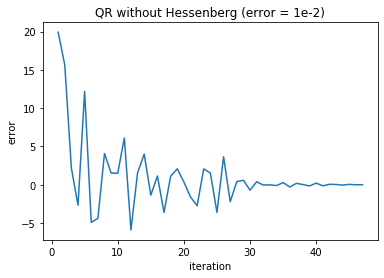

Error = (0.0018100650449639488+0j) after 47 iterations
QR solution: [(7.543172733478279+0j), (2.114150711891103+0.43223520723712544j), (2.114150711891103-0.43223520723712544j), (-1.3857370786302385+1.074016312183859j), (-1.3857370786302385-1.074016312183859j)]
Reference solution: [ 7.54317273+5.55111512e-16j -1.38588064+1.07402548e+00j
 -1.38588064-1.07402548e+00j  2.11429427+4.32553025e-01j
  2.11429427-4.32553025e-01j]


In [143]:
shift = 'no shift'
exp_name = 'E = 1e-2'
qr_mtx = np.copy(mat)

error = 1e-2
e_vals = qr(qr_mtx, error=error, callback = monitor_error)

show_graph("QR without Hessenberg (error = 1e-2)")
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

NoHess_results[exp_name]['err'][shift] = history["err"][-1].real
NoHess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

#### QR without Hessenberg (error = $10^{-3}$)

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


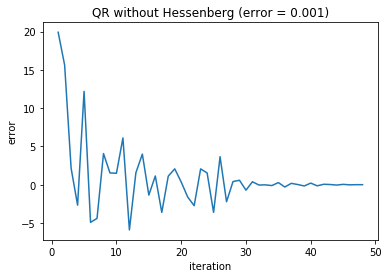

Error = (0.0006879282288565491+0j) after 48 iterations
QR solution: [(7.543172733478279+0j), (2.1142649216393172+0.43197304091236244j), (2.1142649216393172-0.43197304091236244j), (-1.3858512883784528+1.0743337980894136j), (-1.3858512883784528-1.0743337980894136j)]
Reference solution: [ 7.54317273+5.55111512e-16j -1.38588064+1.07402548e+00j
 -1.38588064-1.07402548e+00j  2.11429427+4.32553025e-01j
  2.11429427-4.32553025e-01j]


In [144]:
shift = 'no shift'
exp_name = 'E = 1e-3'
qr_mtx = np.copy(mat)

error = 1e-3
e_vals = qr(qr_mtx, error=error, callback = monitor_error)

show_graph(f'QR without Hessenberg (error = {error})')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

NoHess_results[exp_name]['err'][shift] = history["err"][-1].real
NoHess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

#### QR without Hessenberg (iterations = $50$)

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


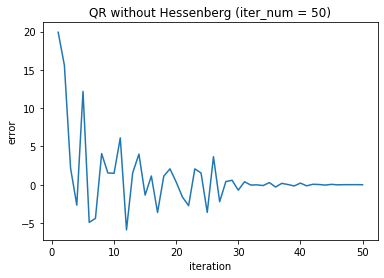

Error = (-0.010324196701674282+0j) after 50 iterations
QR solution: [(7.543172733478279+0j), (2.1137892383402113+0.43188391261991055j), (2.1137892383402113-0.43188391261991055j), (-1.3853756050793473+1.0739820115692877j), (-1.3853756050793473-1.0739820115692877j)]
Reference solution: [ 7.54317273+5.55111512e-16j -1.38588064+1.07402548e+00j
 -1.38588064-1.07402548e+00j  2.11429427+4.32553025e-01j
  2.11429427-4.32553025e-01j]


In [145]:
shift = 'no shift'
exp_name = 'It 50'
qr_mtx = np.copy(mat)

iter_num = 50
e_vals = qr(qr_mtx, iter_num=iter_num, callback = monitor_error)

show_graph(f'QR without Hessenberg (iter_num = {iter_num})')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

NoHess_results[exp_name]['err'][shift] = history["err"][-1].real
NoHess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

#### QR without Hessenberg (iterations = $200$)

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


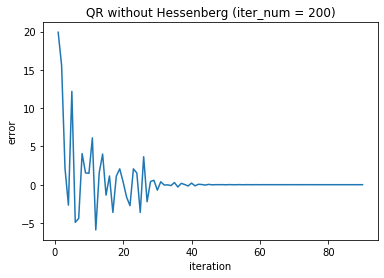

Error = (-9.74529939412605e-07+0j) after 90 iterations
QR solution: [(7.543172733478279+0j), (2.114294267606425+0.4325530571133219j), (2.114294267606425-0.4325530571133219j), (-1.385880634345561+1.0740253415052285j), (-1.385880634345561-1.0740253415052285j)]
Reference solution: [ 7.54317273+5.55111512e-16j -1.38588064+1.07402548e+00j
 -1.38588064-1.07402548e+00j  2.11429427+4.32553025e-01j
  2.11429427-4.32553025e-01j]


In [146]:
shift = 'no shift'
exp_name = 'It 200'
qr_mtx = np.copy(mat)

iter_num = 200
e_vals = qr(qr_mtx, iter_num=iter_num, callback = monitor_error)

show_graph(f'QR without Hessenberg (iter_num = {iter_num})')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

NoHess_results[exp_name]['err'][shift] = history["err"][-1].real
NoHess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

#### Applying noise

In [147]:
np.random.seed(14)
def noise(sigma): # standard normal distribution in the background
    return np.random.randn(5, 5)/sigma

# examples
qr_mtx = np.copy(mat)
qr_noise1 = qr_mtx + noise(1) # medium noise
qr_noise2 = qr_mtx + noise(0.1) # high noise
qr_noise3 = qr_mtx + noise(10) # small noise

print("Original: \n", qr_mtx)
print("Noise 1: \n", qr_noise1)
print("Noise 2: \n", qr_noise2)
print("Noise 3: \n", qr_noise3)

Original: 
 [[2.+0.j 1.+0.j 6.+0.j 3.+0.j 5.+0.j]
 [1.+0.j 1.+0.j 3.+0.j 5.+0.j 1.+0.j]
 [0.+0.j 3.+0.j 1.+0.j 6.+0.j 2.+0.j]
 [0.+0.j 0.+0.j 2.+0.j 3.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 2.+0.j 2.+0.j]]
Noise 1: 
 [[ 3.55133911+0.j  1.07918602+0.j  6.17397653+0.j  2.92766343+0.j
   2.9956706 +0.j]
 [ 1.14467781+0.j -0.50116862+0.j  3.21110945+0.j  4.44179494+0.j
   2.08452906+0.j]
 [-0.18628912+0.j  3.01466137+0.j -0.07556947+0.j  6.64225207+0.j
   1.81966329+0.j]
 [ 0.62030025+0.j  0.81097433+0.j  2.77793587+0.j  2.76251032+0.j
  -0.89191235+0.j]
 [-1.17212179+0.j  0.83620697+0.j  1.0092734 +0.j  3.29309936+0.j
   1.45066883+0.j]]
Noise 2: 
 [[ -7.81712865+0.j  10.14672758+0.j  14.73070378+0.j   3.22111142+0.j
    4.95856416+0.j]
 [-12.49126151+0.j  -1.08217846+0.j  16.26540285+0.j  -4.1626058 +0.j
   -3.70013146+0.j]
 [ -1.49442521+0.j  -0.25260117+0.j -17.05723456+0.j   0.99629811+0.j
   -3.64780646+0.j]
 [ -3.14428573+0.j  -3.96677237+0.j   2.05933112+0.j  -6.97138246+0.j
   17.910

##### First, low noise is applied. Results are similar like in the reference case.

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


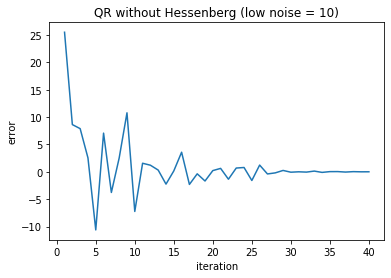

Error = (-0.0004287486900409476+0j) after 40 iterations
QR solution: [(7.610257885398359+0j), (1.720808616863017+0.5721545220625804j), (1.720808616863017-0.5721545220625804j), (-0.9523996513737395+0.9744028752884991j), (-0.9523996513737395-0.9744028752884991j)]
Reference solution: [ 7.54317273+5.55111512e-16j -1.38588064+1.07402548e+00j
 -1.38588064-1.07402548e+00j  2.11429427+4.32553025e-01j
  2.11429427-4.32553025e-01j]


In [148]:
shift = 'no shift'
exp_name = 'Low noise'
error = 1e-3
e_vals = qr(qr_noise3, error=error, callback = monitor_error)

show_graph(f'QR without Hessenberg (low noise = 10)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

NoHess_results[exp_name]['err'][shift] = history["err"][-1].real
NoHess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

##### Second, the medium noise is applied. The result shows that the algorithm converges but the found eigenvalues are not that good. 

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


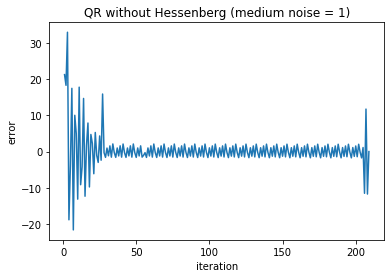

Error = (-3.625899580583791e-10+0j) after 209 iterations
QR solution: [(8.6112770858134+0j), (-3.2490897042871127+0j), (1.7981547733761487+2.25550147044679j), (1.7981547733761487-2.25550147044679j)]
Reference solution: [ 7.54317273+5.55111512e-16j -1.38588064+1.07402548e+00j
 -1.38588064-1.07402548e+00j  2.11429427+4.32553025e-01j
  2.11429427-4.32553025e-01j]


In [149]:
shift = 'no shift'
exp_name = 'Med noise'
error = 1e-3
e_vals = qr(qr_noise1, error=error, callback = monitor_error)

show_graph(f'QR without Hessenberg (medium noise = 1)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

NoHess_results[exp_name]['err'][shift] = history["err"][-1].real
NoHess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

##### Third, the high noise is applied. Here the peaks are more frequent in the convergence graph.

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


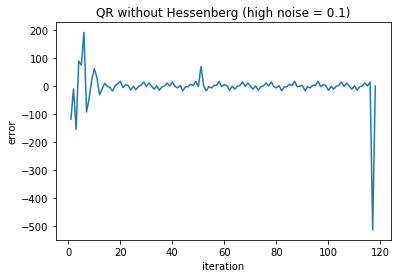

Error = (-4.3098680180264637e-10+0j) after 118 iterations
QR solution: [(-20.008589471996576+0j), (-2.6055784303337917+15.607957902587831j), (-2.6055784303337917-15.607957902587831j), (-8.40487661747202+0j), (-9.085729797745312+0j)]
Reference solution: [ 7.54317273+5.55111512e-16j -1.38588064+1.07402548e+00j
 -1.38588064-1.07402548e+00j  2.11429427+4.32553025e-01j
  2.11429427-4.32553025e-01j]


In [150]:
shift = 'no shift'
exp_name = 'High noise'
error = 1e-3
e_vals = qr(qr_noise2, error=error, callback = monitor_error)

show_graph(f'QR without Hessenberg (high noise = 0.1)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

NoHess_results[exp_name]['err'][shift] = history["err"][-1].real
NoHess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

##### Also, the huge noise is applied, but now without error limit for $50$ and $500$ iterations, and it shows either convergence to wrong eigenvalues or no convergence at all.

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


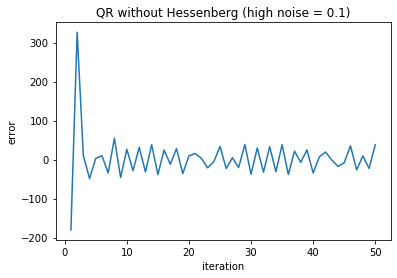

Error = (38.223627896089624+0j) after 50 iterations
QR solution: [(6.884312437752577+0j), (-22.686259330316354+0j), (15.776589931177655+0j), (12.337713352250153+0j)]
Reference solution: [ 7.54317273+5.55111512e-16j -1.38588064+1.07402548e+00j
 -1.38588064-1.07402548e+00j  2.11429427+4.32553025e-01j
  2.11429427-4.32553025e-01j]


In [151]:
# error = 1e-3
qr_mtx = np.copy(mat)
qr_noise2 = qr_mtx + noise(0.1) # huge noise
iter_num=50
error = 1e-12
e_vals = qr(qr_noise2, iter_num=iter_num, error=error, callback = monitor_error)

show_graph(f'QR without Hessenberg (high noise = 0.1)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')
clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


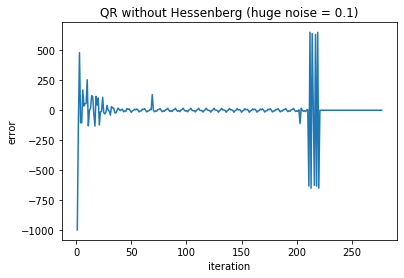

Error = (9.094947017729282e-13+0j) after 277 iterations
QR solution: [(-20.392392303346195+0j), (-3.963026947616354+17.67970313246257j), (-3.963026947616354-17.67970313246257j), (-12.2964318937726+0j)]
Reference solution: [ 7.54317273+5.55111512e-16j -1.38588064+1.07402548e+00j
 -1.38588064-1.07402548e+00j  2.11429427+4.32553025e-01j
  2.11429427-4.32553025e-01j]


In [152]:
# error = 1e-3
qr_mtx = np.copy(mat)
qr_noise2 = qr_mtx + noise(0.1) # huge noise
iter_num=500
error = 1e-12
e_vals = qr(qr_noise2, iter_num=iter_num, error=error, callback = monitor_error)

show_graph(f'QR without Hessenberg (huge noise = 0.1)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')
clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

## Transformation to Hessenberg matrix - Implementation

The shape of the Hessenberg matrix remains invariant for the QR transformation. Therefore after a QR transformation the resulting matrix is also in Hessenberg form.

Instead of working with **A**, it is transformed into **Hessenberg** form (close to upper triangualar form) where the eignevalues remain the same, in order to reduce the complixity from **O($n^3$)** ( O($n^2$) rotation and O($n$) multiplication) into **O($n^2$)**. <br>
$A \rightarrow F = Z^{-1} A Z$ <br>
where $Z$ is a lower triangular matrix and $F$ is the in Hessenberg form: <br>
$$\begin{pmatrix}   f_{11} & f_{21} & . & . & . &   & f_{1n}  \\
                    1 & f_{22} & . & . & . &   & f_{2n}  \\
                    0 &   &  1 &  &   &   & . \\
                    . &   &    & . &   &   & . \\
                    . &   &   &   & . &   &   \\
                    &   &   &   &   &   &   \\
                    0 & 0 & . & . &   & 1 & f_{nn}  \\
\end{pmatrix}$$
<br>
<br>
shifting is used to speed up the convergence, in other words, instead of working with $F_k$ it is shifted by a scalar. <br>
The slow convergence might be caused when two values are close to each other (uisng Hessenberg). <br>
_we need $\lambda_i << \lambda_{i-1}  \rightarrow \left|\frac{\lambda_i}{\lambda_{i-1}}\right| < 1$ <br>
$k \rightarrow \infty \longmapsto {(\frac{\lambda_i}{\lambda_{i-1}})}^{k} \rightarrow 0$_ <br>
so, what we do is to $\frac{\lambda_i}{\lambda_{i-1}} \longmapsto \frac{\lambda_i - s_k}{\lambda_{i-1} - s_k}$, where $s_k$ is the shifting scalar.

In order to get eigenvectors for **A**, we find **F** eigenvectors first, by solving: <br>
$(\lambda - I - F) y = 0$, where $y$ is the eigenvector with $\lambda$ eigenvalue. <br>
In general: <br>
$y_i = \lambda y_{i+1} - \sum_{i=j+1}^{n} f_{j+1, i} . y_i$ <br>
then, **A** eigenvector is $Z.y$ <br>
because: <br>
$F.y = \lambda y$  and $A.Z = Z.F$<br>
then, <br>
$A.(Z.y) = \lambda .(Z.y)$<br>

In [153]:
from scipy.linalg import hessenberg

# def transform_Hessenberg(mtx):
#     A = np.copy(mtx)
#     # init F
#     F = np.zeros(A.shape) 
#     for idx in range(1, A.shape[0]):
#         F[idx, idx - 1] = 1.0
#     Z = np.zeros(A.shape)
#     Z[0, 0] = 1.0
#     for k in range(1, A.shape[1] + 1):
#         Azk = np.matmul(A, Z[:, k - 1])
#         for i in range(0, k):
#             temp = 0.0
#             for j in range(0, i):
#                 temp += F[j, k - 1] * Z[i, j]
#             F[i, k - 1] = (Azk[i] - temp) / Z[i, i]
        
#         if k < A.shape[1]: # to get the last row of F, but here Z[:, k] would be out of range
#             Z[:, k] = Azk[:]
#             for t in range(0, k):
#                 Z[:, k] -= F[t, k - 1] * Z[:, t]

#     return F, Z

## Experiments with the given matrix (Hessenberg)

Similarly, the following subtasks will be investigated: <br>
QR iteration with Hessenberg (convergence speed, eigenvalues)
1. unbounded iteration, error tolerence of $10^{-2}$
2. unbounded iteration, error tolerence of $10^{-3}$
3. unbounded error, $50$ iterations
4. unbounded error, $200$ iterations
5. applying noise ($100$ iterations)

### Eigen values by Numpy package

In [154]:
qr_mtx = np.copy(mat)
ref_solution = np.linalg.eig(qr_mtx)[0]
print("Reference solution:")
for E in ref_solution:
    print(E)

Reference solution:
(7.543172733478283+5.551115123125783e-16j)
(-1.3858806384509044+1.0740254817832868j)
(-1.3858806384509053-1.0740254817832873j)
(2.114294271711765+0.43255302501720355j)
(2.1142942717117656-0.4325530250172039j)


### Data dictionary

In [155]:
main_exps = ["E = 1e-2", "E = 1e-3", "It 50", "It 200", "High noise", "Med noise", "Low noise"]
sub_exps = ["err", "it"]
Hess_results = dict()
for main_exp in main_exps:
    Hess_results[main_exp] = {}
    for sub_exp in sub_exps:
        Hess_results[main_exp].update({sub_exp: {}})
print(Hess_results)

{'E = 1e-2': {'err': {}, 'it': {}}, 'E = 1e-3': {'err': {}, 'it': {}}, 'It 50': {'err': {}, 'it': {}}, 'It 200': {'err': {}, 'it': {}}, 'High noise': {'err': {}, 'it': {}}, 'Med noise': {'err': {}, 'it': {}}, 'Low noise': {'err': {}, 'it': {}}}


In [156]:
# Functions which will be used in the following tasks

history = { "it": [], "err": []}
def monitor_error(error):
    history["err"].append(error)
    history["it"].append(len(history["it"]) + 1)
    
def show_graph(title):
    plt.plot(history["it"], history["err"])

    plt.xlabel('iteration')
    plt.ylabel('error')
    plt.title(title)
    plt.show()

def clear_history():
    history["it"].clear()
    history["err"].clear()

#### QR with Hessenberg (error = $10^{-2}$)

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


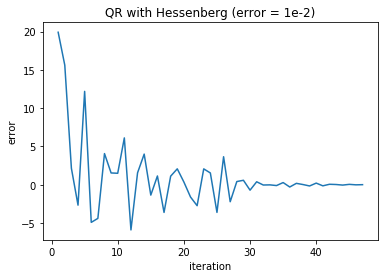

Error = (0.0018100650449639488+0j) after 47 iterations
QR solution: [(7.543172733478279+0j), (2.114150711891103+0.43223520723712544j), (2.114150711891103-0.43223520723712544j), (-1.3857370786302385+1.074016312183859j), (-1.3857370786302385-1.074016312183859j)]
Reference solution: [ 7.54317273+5.55111512e-16j -1.38588064+1.07402548e+00j
 -1.38588064-1.07402548e+00j  2.11429427+4.32553025e-01j
  2.11429427-4.32553025e-01j]


In [157]:
shift = 'no shift'
exp_name = 'E = 1e-2'
qr_mtx = np.copy(mat)
qr_f = hessenberg(qr_mtx)

error = 1e-2
e_vals = qr(qr_f, error=error, callback = monitor_error)

show_graph("QR with Hessenberg (error = 1e-2)")
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

Hess_results[exp_name]['err'][shift] = history["err"][-1].real
Hess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

#### QR with Hessenberg (error = $10^{-3}$)

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


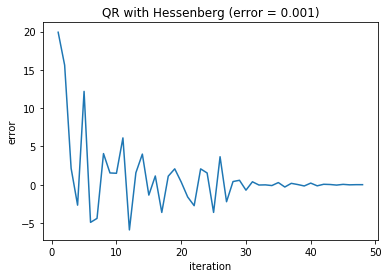

Error = (0.0006879282288565491+0j) after 48 iterations
QR solution: [(7.543172733478279+0j), (2.1142649216393172+0.43197304091236244j), (2.1142649216393172-0.43197304091236244j), (-1.3858512883784528+1.0743337980894136j), (-1.3858512883784528-1.0743337980894136j)]
Reference solution: [ 7.54317273+5.55111512e-16j -1.38588064+1.07402548e+00j
 -1.38588064-1.07402548e+00j  2.11429427+4.32553025e-01j
  2.11429427-4.32553025e-01j]


In [158]:
shift = 'no shift'
exp_name = 'E = 1e-3'
qr_mtx = np.copy(mat)
qr_f = hessenberg(qr_mtx)

error = 1e-3
e_vals = qr(qr_f, error=error, callback = monitor_error)

show_graph(f'QR with Hessenberg (error = {error})')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

Hess_results[exp_name]['err'][shift] = history["err"][-1].real
Hess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

#### QR with Hessenberg (iterations = $50$)

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


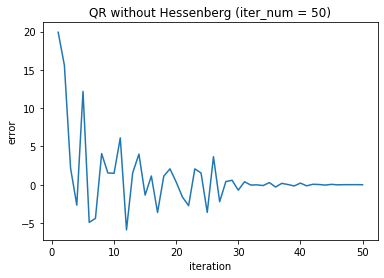

Error = (-0.010324196701674282+0j) after 50 iterations
QR solution: [(7.543172733478279+0j), (2.1137892383402113+0.43188391261991055j), (2.1137892383402113-0.43188391261991055j), (-1.3853756050793473+1.0739820115692877j), (-1.3853756050793473-1.0739820115692877j)]
Reference solution: [ 7.54317273+5.55111512e-16j -1.38588064+1.07402548e+00j
 -1.38588064-1.07402548e+00j  2.11429427+4.32553025e-01j
  2.11429427-4.32553025e-01j]


In [159]:
shift = 'no shift'
exp_name = 'It 50'
qr_mtx = np.copy(mat)
qr_f = hessenberg(qr_mtx)

iter_num = 50
e_vals = qr(qr_f, iter_num=iter_num, callback = monitor_error)

show_graph(f'QR without Hessenberg (iter_num = {iter_num})')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

Hess_results[exp_name]['err'][shift] = history["err"][-1].real
Hess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

#### QR with Hessenberg (iterations = $200$)

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


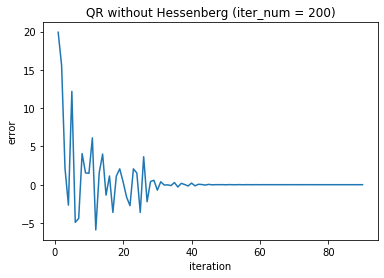

Error = (-9.74529939412605e-07+0j) after 90 iterations
QR solution: [(7.543172733478279+0j), (2.114294267606425+0.4325530571133219j), (2.114294267606425-0.4325530571133219j), (-1.385880634345561+1.0740253415052285j), (-1.385880634345561-1.0740253415052285j)]
Reference solution: [ 7.54317273+5.55111512e-16j -1.38588064+1.07402548e+00j
 -1.38588064-1.07402548e+00j  2.11429427+4.32553025e-01j
  2.11429427-4.32553025e-01j]


In [160]:
shift = 'no shift'
exp_name = 'It 200'
qr_mtx = np.copy(mat)
qr_f = hessenberg(qr_mtx)

iter_num = 200
e_vals = qr(qr_f, iter_num=iter_num, callback = monitor_error)

show_graph(f'QR without Hessenberg (iter_num = {iter_num})')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

Hess_results[exp_name]['err'][shift] = history["err"][-1].real
Hess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

#### Applying noise

In [161]:
np.random.seed(14)
def noise(sigma): # standard normal distribution in the background
    return np.random.randn(5, 5)/sigma

# examples
qr_mtx = np.copy(mat)
qr_noise1 = qr_mtx + noise(1) # medium noise
qr_noise2 = qr_mtx + noise(0.1) # huge noise
qr_noise3 = qr_mtx + noise(10) # small noise

print("Original: \n", qr_mtx)
print("Noise 1: \n", qr_noise1)
print("Noise 2: \n", qr_noise2)
print("Noise 3: \n", qr_noise3)

Original: 
 [[2.+0.j 1.+0.j 6.+0.j 3.+0.j 5.+0.j]
 [1.+0.j 1.+0.j 3.+0.j 5.+0.j 1.+0.j]
 [0.+0.j 3.+0.j 1.+0.j 6.+0.j 2.+0.j]
 [0.+0.j 0.+0.j 2.+0.j 3.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 2.+0.j 2.+0.j]]
Noise 1: 
 [[ 3.55133911+0.j  1.07918602+0.j  6.17397653+0.j  2.92766343+0.j
   2.9956706 +0.j]
 [ 1.14467781+0.j -0.50116862+0.j  3.21110945+0.j  4.44179494+0.j
   2.08452906+0.j]
 [-0.18628912+0.j  3.01466137+0.j -0.07556947+0.j  6.64225207+0.j
   1.81966329+0.j]
 [ 0.62030025+0.j  0.81097433+0.j  2.77793587+0.j  2.76251032+0.j
  -0.89191235+0.j]
 [-1.17212179+0.j  0.83620697+0.j  1.0092734 +0.j  3.29309936+0.j
   1.45066883+0.j]]
Noise 2: 
 [[ -7.81712865+0.j  10.14672758+0.j  14.73070378+0.j   3.22111142+0.j
    4.95856416+0.j]
 [-12.49126151+0.j  -1.08217846+0.j  16.26540285+0.j  -4.1626058 +0.j
   -3.70013146+0.j]
 [ -1.49442521+0.j  -0.25260117+0.j -17.05723456+0.j   0.99629811+0.j
   -3.64780646+0.j]
 [ -3.14428573+0.j  -3.96677237+0.j   2.05933112+0.j  -6.97138246+0.j
   17.910

##### First, low noise is applied. Results are similar like in the reference case.

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


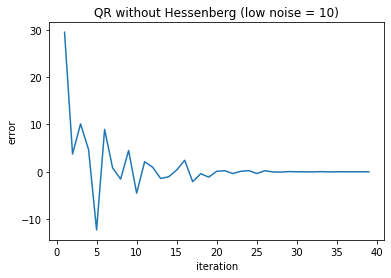

Error = (3.9912874306935464e-05+0j) after 39 iterations
QR solution: [(7.610257885398357+0j), (1.7207484745059465+0.5714941581144101j), (1.7207484745059465-0.5714941581144101j), (-0.9523395090166695+0.9746908920185114j), (-0.9523395090166695-0.9746908920185114j)]
Reference solution: [ 7.54317273+5.55111512e-16j -1.38588064+1.07402548e+00j
 -1.38588064-1.07402548e+00j  2.11429427+4.32553025e-01j
  2.11429427-4.32553025e-01j]


In [162]:
shift = 'no shift'
exp_name = 'Low noise'
qr_mtx = np.copy(qr_noise3)
qr_f = hessenberg(qr_mtx)

error = 1e-3
e_vals = qr(qr_f, error=error, callback = monitor_error)

show_graph(f'QR without Hessenberg (low noise = 10)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

Hess_results[exp_name]['err'][shift] = history["err"][-1].real
Hess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

##### Second, the medium noise is applied. The result shows that the algorithm converges but the found eigenvalues are not that good. 

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


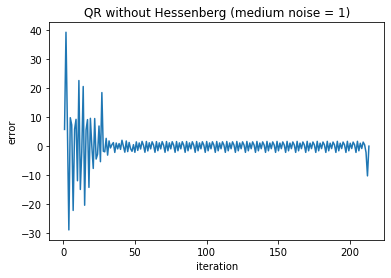

Error = (5.495621735462919e-10+0j) after 213 iterations
QR solution: [(8.61127708581339+0j), (-3.2490897043370452+0j), (1.7981547734011072+2.2555014703873995j), (1.7981547734011072-2.2555014703873995j)]
Reference solution: [ 7.54317273+5.55111512e-16j -1.38588064+1.07402548e+00j
 -1.38588064-1.07402548e+00j  2.11429427+4.32553025e-01j
  2.11429427-4.32553025e-01j]


In [163]:
shift = 'no shift'
exp_name = 'Med noise'
qr_mtx = np.copy(qr_noise1)
qr_f = hessenberg(qr_mtx)

error = 1e-3
e_vals = qr(qr_f, error=error, callback = monitor_error)

show_graph(f'QR without Hessenberg (medium noise = 1)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

Hess_results[exp_name]['err'][shift] = history["err"][-1].real
Hess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

##### Third, the high noise is applied. Here the peaks are more frequent in the convergence graph.

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


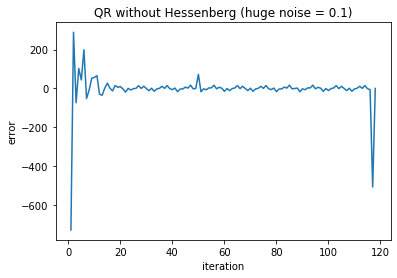

Error = (-4.3094416923850076e-10+0j) after 118 iterations
QR solution: [(-20.008589471996608+0j), (-2.605578430333757+15.607957902587852j), (-2.605578430333757-15.607957902587852j), (-8.404876617472004+0j), (-9.085729797745254+0j)]
Reference solution: [ 7.54317273+5.55111512e-16j -1.38588064+1.07402548e+00j
 -1.38588064-1.07402548e+00j  2.11429427+4.32553025e-01j
  2.11429427-4.32553025e-01j]


In [164]:
shift = 'no shift'
exp_name = 'High noise'
qr_mtx = np.copy(qr_noise2)
qr_f = hessenberg(qr_mtx)

error = 1e-3
e_vals = qr(qr_f, error=error, callback = monitor_error)

show_graph(f'QR without Hessenberg (huge noise = 0.1)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')

Hess_results[exp_name]['err'][shift] = history["err"][-1].real
Hess_results[exp_name]['it'][shift] = history["it"][-1]

clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

##### Also, the huge noise is applied, but now without error limit for $50$ and $500$ iterations, and it shows either convergence to wrong eigenvalues or no convergence at all.

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


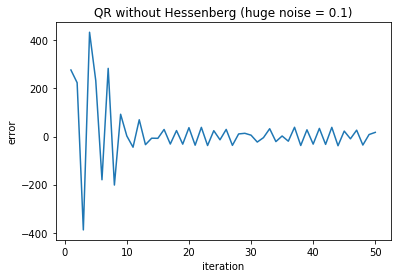

Error = (17.379947519948246+0j) after 50 iterations
QR solution: [(7.354691048350807+0j), (-22.68625921405907+0j), (15.30621838054649+0j), (12.337706175995095+0j)]
Reference solution: [ 7.54317273+5.55111512e-16j -1.38588064+1.07402548e+00j
 -1.38588064-1.07402548e+00j  2.11429427+4.32553025e-01j
  2.11429427-4.32553025e-01j]


In [165]:
# error = 1e-3
qr_mtx = np.copy(mat)
qr_noise2 = qr_mtx + noise(0.1) # huge noise

qr_mtx = np.copy(qr_noise2)
qr_f = hessenberg(qr_mtx)

iter_num=50
error = 1e-12
e_vals = qr(qr_f, iter_num=iter_num, error=error, callback = monitor_error)

show_graph(f'QR without Hessenberg (huge noise = 0.1)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')
clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\alshouha\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


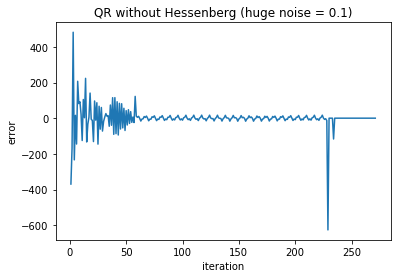

Error = (3.126388037344441e-13+0j) after 271 iterations
QR solution: [(-20.392392303346398+0j), (-3.963026947616272+17.67970313246266j), (-3.963026947616272-17.67970313246266j), (-12.296431893772352+0j)]
Reference solution: [ 7.54317273+5.55111512e-16j -1.38588064+1.07402548e+00j
 -1.38588064-1.07402548e+00j  2.11429427+4.32553025e-01j
  2.11429427-4.32553025e-01j]


In [166]:
# error = 1e-3
qr_mtx = np.copy(mat)
qr_noise2 = qr_mtx + noise(0.1) # huge noise

qr_mtx = np.copy(qr_noise2)
qr_f = hessenberg(qr_mtx)

iter_num=500
error = 1e-12
e_vals = qr(qr_f, iter_num=iter_num, error=error, callback = monitor_error)

show_graph(f'QR without Hessenberg (huge noise = 0.1)')
print(f'Error = {history["err"][-1]} after {history["it"][-1]} iterations')
clear_history()

print(f"QR solution: {e_vals}")
print(f"Reference solution: {ref_solution}")

In [167]:
Hess_results

{'E = 1e-2': {'err': {'no shift': 0.0018100650449639488},
  'it': {'no shift': 47}},
 'E = 1e-3': {'err': {'no shift': 0.0006879282288565491},
  'it': {'no shift': 48}},
 'It 50': {'err': {'no shift': -0.010324196701674282}, 'it': {'no shift': 50}},
 'It 200': {'err': {'no shift': -9.74529939412605e-07},
  'it': {'no shift': 90}},
 'High noise': {'err': {'no shift': -4.3094416923850076e-10},
  'it': {'no shift': 118}},
 'Med noise': {'err': {'no shift': 5.495621735462919e-10},
  'it': {'no shift': 213}},
 'Low noise': {'err': {'no shift': 3.9912874306935464e-05},
  'it': {'no shift': 39}}}

In [168]:
NoHess_results

{'E = 1e-2': {'err': {'no shift': 0.0018100650449639488},
  'it': {'no shift': 47}},
 'E = 1e-3': {'err': {'no shift': 0.0006879282288565491},
  'it': {'no shift': 48}},
 'It 50': {'err': {'no shift': -0.010324196701674282}, 'it': {'no shift': 50}},
 'It 200': {'err': {'no shift': -9.74529939412605e-07},
  'it': {'no shift': 90}},
 'High noise': {'err': {'no shift': -4.3098680180264637e-10},
  'it': {'no shift': 118}},
 'Med noise': {'err': {'no shift': -3.625899580583791e-10},
  'it': {'no shift': 209}},
 'Low noise': {'err': {'no shift': -0.0004287486900409476},
  'it': {'no shift': 40}}}

In [169]:
print("Without Hessenberg Results")
df = pd.DataFrame.from_dict({(i,j): NoHess_results[i][j] 
                           for i in NoHess_results.keys() 
                           for j in NoHess_results[i].keys()},
                       orient='index')
df

Without Hessenberg Results


no shift
E = 1e-2   err  1.810065e-03
           it   4.700000e+01
E = 1e-3   err  6.879282e-04
           it   4.800000e+01
High noise err -4.309868e-10
           it   1.180000e+02
It 200     err -9.745299e-07
           it   9.000000e+01
It 50      err -1.032420e-02
           it   5.000000e+01
Low noise  err -4.287487e-04
           it   4.000000e+01
Med noise  err -3.625900e-10
           it   2.090000e+02

In [170]:
print("With Hessenberg Results")
df = pd.DataFrame.from_dict({(i,j): Hess_results[i][j] 
                           for i in Hess_results.keys() 
                           for j in Hess_results[i].keys()},
                       orient='index')
df

With Hessenberg Results


no shift
E = 1e-2   err  1.810065e-03
           it   4.700000e+01
E = 1e-3   err  6.879282e-04
           it   4.800000e+01
High noise err -4.309442e-10
           it   1.180000e+02
It 200     err -9.745299e-07
           it   9.000000e+01
It 50      err -1.032420e-02
           it   5.000000e+01
Low noise  err  3.991287e-05
           it   3.900000e+01
Med noise  err  5.495622e-10
           it   2.130000e+02

## Conclusion

* For this specific example the implemented algorith was able to find the eigenvalues.
* If the transformation to Hessenberg-form was applied the convergence time was not affected. But it made curves less noisy.
* Shifting has not shown the expected effect. Instead it slightly made slower the convergence in most cases.
* High noise cause fluctuating convergence curves and un patterned behaviour, regardless of the version which is used with it.

## Reference

* Rózsa Pál, Lineáris algebra és alkalmazásai, 3. kiadás, 1991
* https://github.com/adamtiger/ai/tree/code
* https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.eig.html (the refernce calculation of the eigenvalues was based on the numpy library corresponding function)